# Neural network model from scratch

In this script, a neural network model from scratch is implemented. It consist of embdedding layer, a convolutional layer and a dense layer for the task of topic classification. In this particular script, the model is regularized with dropout for attempting to reduce the overfitting.

## Import Libraries

Import all necessary libraries for data handling, machine learning, and visualization.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras import Input, Model
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

## Load and Prepare Data

Load the data from a pickle file, which contains preprocessed text and binary labels for topics. Split the data into training and validation sets.

In [2]:
# Load the dataset
file_path = "main_dataset_correctedSingleTopics.pkl"
data = pd.read_pickle(file_path)

# Extract texts and corresponding binary topic labels
texts = data['text'].values
targets = data.loc[:, 'Academic_disciplines':'Universe'].values

X_train_text, X_test_text, y_train, y_test = train_test_split(texts, targets, test_size=0.3, random_state=42)
X_train_text, X_val_text, y_train, y_val = train_test_split(X_train_text, y_train, test_size=0.3, random_state=42)

## Model Definition

Define the architecture of the neural network using TensorFlow and Keras. The model includes text vectorization, embedding, convolutional, and dense layers.

In [3]:
# Define model parameters
vocab_size = 20000
sequence_length = 200

# Text vectorization
vectorizer = TextVectorization(max_tokens=vocab_size, output_mode='int', output_sequence_length=sequence_length)
vectorizer.adapt(X_train_text)

# Build the neural network model
def build_model(vocab_size, embedding_dim, sequence_length):
    inputs = Input(shape=(sequence_length,), dtype=tf.int64)
    x = Embedding(input_dim=vocab_size + 1, output_dim=embedding_dim, input_length=sequence_length)(inputs)
    x = Conv1D(128, 5, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(targets.shape[1], activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

embedding_dim = 100
model = build_model(vocab_size, embedding_dim, sequence_length)

import tensorflow as tf

def hamming_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32) 
    return tf.reduce_mean(tf.reduce_sum(tf.abs(y_true - tf.round(y_pred)), axis=-1) / tf.cast(tf.shape(y_true)[-1], tf.float32))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', hamming_loss])
model.summary()

c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 100)       │     2,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │         2,535 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,075,019 (7.92 MB)

 Trainable params: 2,075,019 (7.92 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

Train the neural network on the training data and validate on the validation set to monitor performance.

In [4]:
x_train_vect = vectorizer(X_train_text)
x_val_vect = vectorizer(X_val_text)
history = model.fit(x_train_vect, y_train, epochs=10, batch_size=32, validation_data=(x_val_vect, y_val))

Epoch 1/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 104s 34ms/step - accuracy: 0.2101 - hamming_loss: 0.0635 - loss: 0.1935 - val_accuracy: 0.3163 - val_hamming_loss: 0.0375 - val_loss: 0.1118
Epoch 2/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 103s 34ms/step - accuracy: 0.3128 - hamming_loss: 0.0385 - loss: 0.1186 - val_accuracy: 0.3570 - val_hamming_loss: 0.0356 - val_loss: 0.1045
Epoch 3/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 100s 33ms/step - accuracy: 0.3467 - hamming_loss: 0.0370 - loss: 0.1088 - val_accuracy: 0.3764 - val_hamming_loss: 0.0348 - val_loss: 0.1017
Epoch 4/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 99s 32ms/step - accuracy: 0.3653 - hamming_loss: 0.0354 - loss: 0.1012 - val_accuracy: 0.3854 - val_hamming_loss: 0.0342 - val_loss: 0.1003
Epoch 5/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 100s 33ms/step - accuracy: 0.3746 - hamming_loss: 0.0343 - loss: 0.0951 - val_accuracy: 0.3754 - val_hamming_loss: 0.0340 - val_loss: 0.1019
Epoch 6/10
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 102s 33ms/step - accuracy: 0.3826 - hamming_

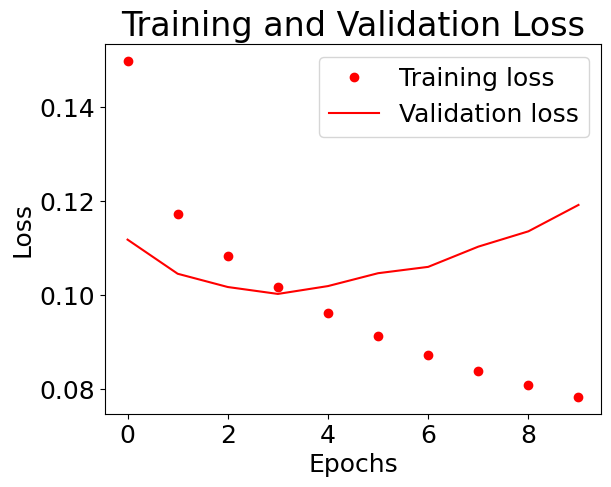

In [20]:
plt.plot(history.history['loss'], 'ro', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

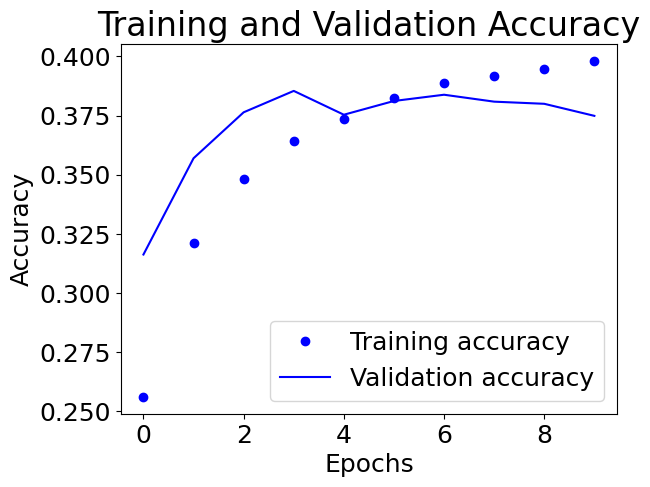

In [21]:
plt.plot(history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

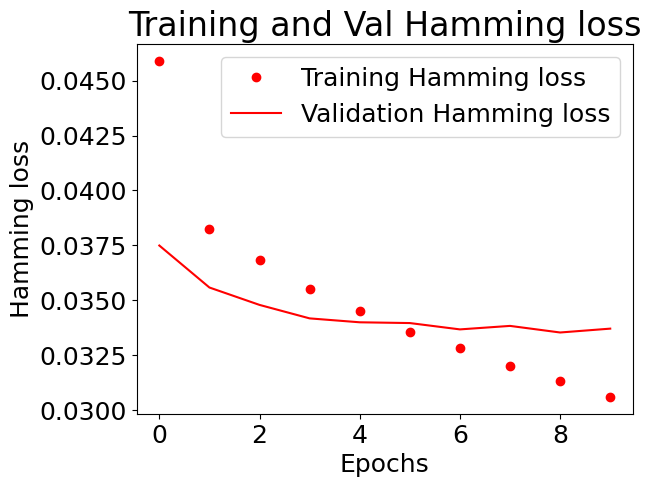

In [19]:
plt.plot(history.history['hamming_loss'], 'ro', label='Training Hamming loss')
plt.plot(history.history['val_hamming_loss'], 'r', label='Validation Hamming loss')
plt.title('Training and Val Hamming loss')
plt.xlabel('Epochs')
plt.ylabel('Hamming loss')
plt.legend()
plt.show()

## Prediction and Evaluation

Define functions for making predictions and visualizing them. Predictions are adjusted to classify only the top 3 most probable topics that also have a probability greater than 0.1. Evaluate the model using common multilabel classification metrics.

In [9]:
all_topics = [
    "Academic_disciplines", "Business", "Communication", "Concepts", "Culture",
    "Economy", "Education", "Energy", "Engineering", "Entities", "Entertainment",
    "Ethics", "Food_and_drink", "Geography", "Government", "Health", "History",
    "Human_behavior", "Humanities", "Information", "Internet", "Knowledge",
    "Language", "Law", "Life", "Mathematics", "Military", "Nature", "People",
    "Philosophy", "Politics", "Religion", "Science", "Society", "Sports",
    "Technology", "Time", "Universe", "Mass_media"
]

def predict_topics(text):
    text_vect = vectorizer([text])
    predicted = model.predict(text_vect)
    top_indices = np.argsort(predicted[0])[-3:]
    predicted_labels = np.zeros_like(predicted[0])
    for idx in top_indices:
        if predicted[0][idx] > 0.1:
            predicted_labels[idx] = 1
    return predicted_labels

# Evaluate the model
preds = []
for text in X_val_text[0:1000]:
    preds.append(predict_topics(text))
preds = np.array(preds)
print("Accuracy Score:", accuracy_score(y_val[0:1000], preds))
print("Precision Score:", precision_score(y_val[0:1000], preds, average='micro'))
print("Recall Score:", recall_score(y_val[0:1000], preds, average='micro'))
print("F1 Score:", f1_score(y_val[0:1000], preds, average='micro'))
print("Hamming Loss:", hamming_loss(y_val[0:1000], preds))
print("Hamming accuracy:", 1-hamming_loss(y_val[0:1000], preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

### Multilabel classification metrics

In [28]:
#def calculate_metrics(y_true, y_pred):
    #y_pred_binary = (y_pred > 0.1).astype(int)
    #y_pred_binary = y_pred
    #exact_match = accuracy_score(y_true, y_pred_binary)
    #hamming_accuracy = 1 - hamming_loss(y_true, y_pred_binary)
    #report = classification_report(y_true, y_pred_binary, target_names=all_topics, output_dict=True)
    #label_based_accuracy = {label: (info['precision'] + info['recall']) / 2 
    #                        for label, info in report.items() if label in all_topics}

    #jaccard_index = jaccard_score(y_true, y_pred_binary, average='samples')

    #print(f"Exact Match Ratio (Subset Accuracy): {exact_match}")
    #print(f"Hamming Accuracy: {hamming_accuracy}")
    #print("Label-based Accuracies:", label_based_accuracy)
    #print(f"Average Jaccard Index (Partial Match Accuracy): {jaccard_index}")
    #print("Classification Report:\n", classification_report(y_true, y_pred_binary, target_names=all_topics))

#calculate_metrics(y_val[:1000], preds)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, hamming_loss, jaccard_score

def subset_accuracy(y_true, y_pred):
    return np.mean([set(np.where(yt == 1)[0]).issubset(set(np.where(yp == 1)[0])) for yt, yp in zip(y_true, y_pred)])

def calculate_metrics(y_true, y_pred):
    y_pred_binary = y_pred
    exact_match = accuracy_score(y_true, y_pred_binary)
    hamming_accuracy = 1 - hamming_loss(y_true, y_pred_binary)
    report = classification_report(y_true, y_pred_binary, target_names=all_topics, output_dict=True)
    label_based_accuracy = {label: (info['precision'] + info['recall']) / 2 
                            for label, info in report.items() 
                            if label != 'accuracy' and not label.startswith('macro avg') and not label.startswith('weighted avg')}

    jaccard_index = jaccard_score(y_true, y_pred_binary, average='samples')
    sub_acc = subset_accuracy(y_true, y_pred_binary)  
    average_label_based_accuracy = np.mean(list(label_based_accuracy.values()))

    print(f"Exact Match Ratio: {exact_match}")
    print(f"Hamming Accuracy: {hamming_accuracy}")
    print("Label-based Accuracies:", label_based_accuracy)
    print(f"Average Label-based Accuracy: {average_label_based_accuracy:.3f}")
    print(f"Average Jaccard Index (Partial Match Accuracy): {jaccard_index}")
    print(f"Subset Accuracy: {sub_acc}")
    print("Classification Report:\n", classification_report(y_true, y_pred_binary, target_names=all_topics))

calculate_metrics(y_val[:1000], preds)

Exact Match Ratio: 0.222
Hamming Accuracy: 0.9538974358974359
Label-based Accuracies: {'Academic_disciplines': 0.34797529169526425, 'Business': 0.4340425531914894, 'Communication': 0.0, 'Concepts': 0.31666666666666665, 'Culture': 0.3918411164787976, 'Economy': 0.5787037037037037, 'Education': 0.5803787878787878, 'Energy': 0.42857142857142855, 'Engineering': 0.3535980148883375, 'Entities': 0.7461988304093568, 'Entertainment': 0.0, 'Ethics': 0.0, 'Food_and_drink': 0.3833333333333333, 'Geography': 0.6648867436910915, 'Government': 0.6493448811903175, 'Health': 0.5058064516129033, 'History': 0.5435114503816794, 'Human_behavior': 0.3046296296296296, 'Humanities': 0.5613627564847077, 'Information': 0.11805555555555555, 'Internet': 0.2, 'Knowledge': 0.4340277777777778, 'Language': 0.6469907407407407, 'Law': 0.6737967914438503, 'Life': 0.829235880398671, 'Mathematics': 0.7006885758998436, 'Military': 0.625, 'Nature': 0.6464646464646464, 'People': 0.526847290640394, 'Philosophy': 0.907148032751

c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


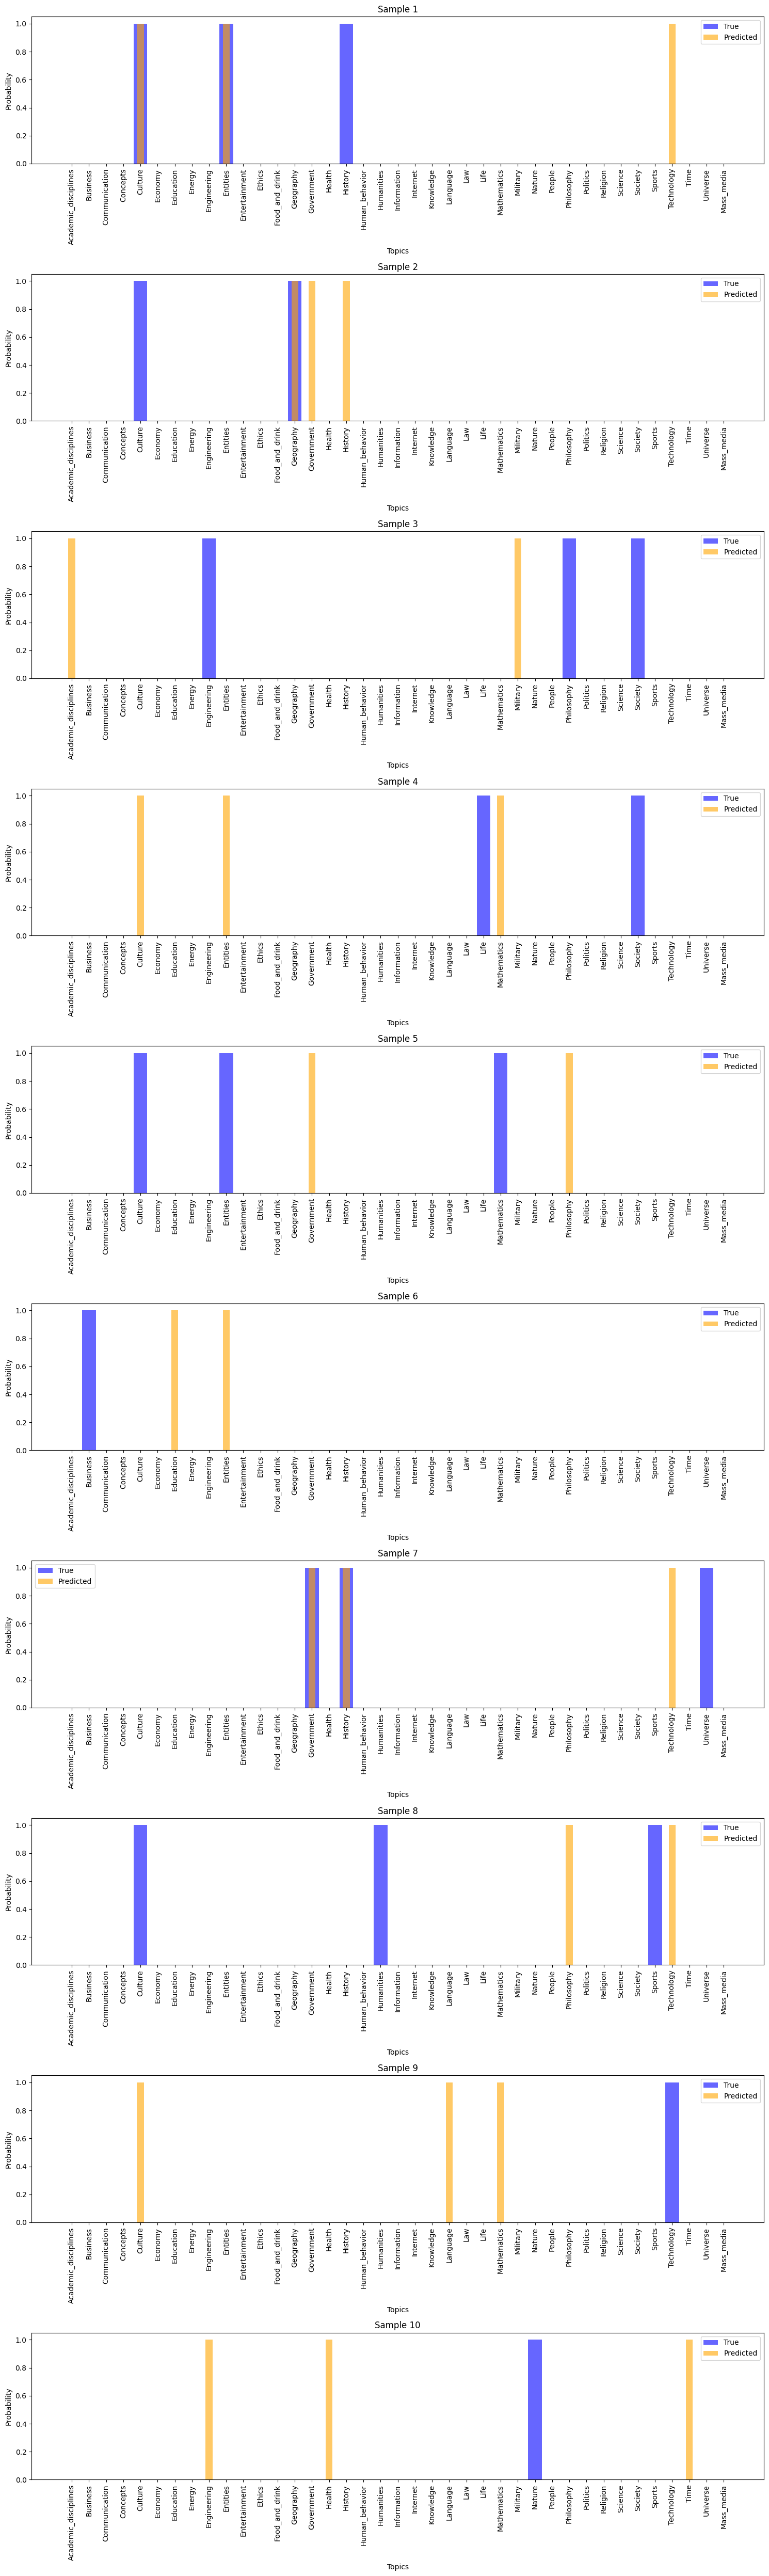

In [28]:
def visualize_predictions(num_samples=10):
    sample_indices = random.sample(range(len(x_val)), num_samples)
    fig, axes = plt.subplots(num_samples, 1, figsize=(15, 5 * num_samples))
    for i, idx in enumerate(sample_indices):
        sample_text = x_val[idx]
        true_probs = y_val[idx]
        pred_probs = predict_topics(sample_text)
        axes[i].bar(range(len(true_probs)), true_probs, alpha=0.6, label='True', color='blue')
        axes[i].bar(range(len(pred_probs)), pred_probs, alpha=0.6, label='Predicted', color='orange', width=0.4)
        axes[i].set_title(f"Sample {i+1}")
        axes[i].set_xlabel("Topics")
        axes[i].set_ylabel("Probability")
        axes[i].legend()
        axes[i].set_xticks(np.arange(len(true_probs)))
        axes[i].set_xticklabels(all_topics, rotation='vertical')
        plt.tight_layout()
    plt.show()

visualize_predictions()

In [29]:
def display_sample_predictions(num_samples=5):
    sample_indices = random.sample(range(len(x_val)), num_samples)
    for idx in sample_indices:
        sample_text = x_val[idx]
        true_labels = y_val[idx]
        pred_labels = predict_topics(x_val[idx])
        
        true_topics = [all_topics[i] for i in range(len(true_labels)) if true_labels[i] == 1]
        predicted_topics = [all_topics[i] for i in range(len(pred_labels)) if pred_labels[i] == 1]
        
        print(f"Sample Text: {sample_text}")
        print(f"True Labels: {true_topics}")
        print(f"Predicted Labels: {predicted_topics}")
        print("\n" + "-"*100 + "\n")

display_sample_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample Text:   Guido Emanuel Villar (born 15 February 1998) is an Argentine professional Association football|footballer who plays as a Goalkeeper (association football)|goalkeeper for Club Olimpo|Olimpo . Club career Villar's senior career got underway with Club Olimpo|Olimpo , after a youth stint with them, Villa Delfina (between 2006 and 2007) and Bella Vista de Bahía Blanca|Bella Vista . He was put into the first-team of the Argentine Primera División|Primera División club in 2016–17 Argentine Primera División|2016–17 , but didn't make his debut until 2017–18 Club Olimpo season|2017–18 when he marked it with a ninety-minute appearance against San Lorenzo de Almagro|San Lorenzo at the Estadio Pedro Bidegain on 17 March 2018; on the way to four appearances as Olimpo suffered relegation. International career Villar was called up to train with the Argentina national under-17 football team|Argentina U17s in 2014. Career statistics . References Exter

### Evaluation on the test set

In [28]:
preds_test = []
for text in X_test_text[0:1000]:
    preds_test.append(predict_topics(text))
preds_test = np.array(preds_test)

calculate_metrics(y_test[:1000], preds_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,